#Scraping

In [ ]:
import subprocess
import sys

# ฟังก์ชันสำหรับติดตั้ง package อัตโนมัติ
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# ตรวจสอบการ import ถ้าไม่มีจะ install ให้อัตโนมัติ
for pkg in ["lxml", "html5lib"]:
    try:
        __import__(pkg)
    except ImportError:
        print(f"{pkg} not found. Installing...")
        install(pkg)

import pandas as pd

url = "https://www.basketball-reference.com/teams/DAL/stats_basic_totals.html"

# ดึงข้อมูลทุกตารางจากหน้า
df_list = pd.read_html(url, header=0)

# ตารางแรกคือ season history ของทีม DAL
df = df_list[0]

# ทำความสะอาด
df = df[df["Season"] != "Season"].dropna(how="all").reset_index(drop=True)

print(df.head())

# บันทึกเป็น CSV
df.to_csv("basketball.csv", index=False, encoding="utf-8-sig")
print("บันทึกไฟล์ basketball.csv เรียบร้อยแล้ว ✅")


    Season   Lg   Tm   W   L Finish  Unnamed: 6   Age  Ht.  Wt.  ...   FT%  \
0  2024-25  NBA  DAL  39  43      3         NaN  27.5  6-6  217  ...  .770   
1  2023-24  NBA  DAL  50  32      1         NaN  26.5  6-6  217  ...  .758   
2  2022-23  NBA  DAL  38  44      3         NaN  27.8  6-6  215  ...  .755   
3  2021-22  NBA  DAL  52  30      2         NaN  26.7  6-6  218  ...  .771   
4  2020-21  NBA  DAL  42  30      1         NaN  26.3  6-7  219  ...  .778   

   ORB   DRB   TRB   AST  STL  BLK   TOV    PF   PTS  
0  828  2702  3530  2070  636  445  1151  1458  9364  
1  797  2724  3521  2106  563  406  1027  1500  9664  
2  625  2556  3181  1880  514  304  1002  1697  9366  
3  759  2769  3528  1918  552  325  1025  1612  8858  
4  657  2463  3120  1647  450  311   869  1396  8096  

[5 rows x 34 columns]
บันทึกไฟล์ basketball.csv เรียบร้อยแล้ว ✅


#Model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd

In [39]:
basketball = pd.read_csv('/content/drive/MyDrive/Wep Scraping/basketball.csv')
basketball

,Season,Lg,Tm,W,L,Finish,Unnamed: 6,Age,Ht.,Wt.,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2024-25,NBA,DAL,39,43,3,NaN,27.5,6-6,217,...,0.770,828,2702,3530,2070,636,445,1151,1458,9364
1,2023-24,NBA,DAL,50,32,1,NaN,26.5,6-6,217,...,0.758,797,2724,3521,2106,563,406,1027,1500,9664
2,2022-23,NBA,DAL,38,44,3,NaN,27.8,6-6,215,...,0.755,625,2556,3181,1880,514,304,1002,1697,9366
3,2021-22,NBA,DAL,52,30,2,NaN,26.7,6-6,218,...,0.771,759,2769,3528,1918,552,325,1025,1612,8858
4,2020-21,NBA,DAL,42,30,1,NaN,26.3,6-7,219,...,0.778,657,2463,3120,1647,450,311,869,1396,8096
5,2019-20,NBA,DAL,43,32,2,NaN,26.1,6-6,217,...,0.779,791,2729,3520,1849,460,363,953,1462,8776
6,2018-19,NBA,DAL,33,49,5,NaN,26.9,6-6,222,...,0.742,832,2884,3716,1918,533,351,1167,1650,8927
7,2017-18,NBA,DAL,24,58,4,NaN,27.7,6-6,213,...,0.763,666,2717,3383,1858,578,310,1007,1578,8390
8,2016-17,NBA,DAL,33,49,5,NaN,27.6,6-6,214,...,0.801,647,2516,3163,1705,614,307,972,1567,8029
9,2015-16,NBA,DAL,42,40,2,NaN,30.3,6-6,223,...,0.794,751,2781,3532,1813,560,306,1047,1595,8388


In [40]:
basketball_df = pd.DataFrame(basketball)
basketball_df

,Season,Lg,Tm,W,L,Finish,Unnamed: 6,Age,Ht.,Wt.,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2024-25,NBA,DAL,39,43,3,NaN,27.5,6-6,217,...,0.770,828,2702,3530,2070,636,445,1151,1458,9364
1,2023-24,NBA,DAL,50,32,1,NaN,26.5,6-6,217,...,0.758,797,2724,3521,2106,563,406,1027,1500,9664
2,2022-23,NBA,DAL,38,44,3,NaN,27.8,6-6,215,...,0.755,625,2556,3181,1880,514,304,1002,1697,9366
3,2021-22,NBA,DAL,52,30,2,NaN,26.7,6-6,218,...,0.771,759,2769,3528,1918,552,325,1025,1612,8858
4,2020-21,NBA,DAL,42,30,1,NaN,26.3,6-7,219,...,0.778,657,2463,3120,1647,450,311,869,1396,8096
5,2019-20,NBA,DAL,43,32,2,NaN,26.1,6-6,217,...,0.779,791,2729,3520,1849,460,363,953,1462,8776
6,2018-19,NBA,DAL,33,49,5,NaN,26.9,6-6,222,...,0.742,832,2884,3716,1918,533,351,1167,1650,8927
7,2017-18,NBA,DAL,24,58,4,NaN,27.7,6-6,213,...,0.763,666,2717,3383,1858,578,310,1007,1578,8390
8,2016-17,NBA,DAL,33,49,5,NaN,27.6,6-6,214,...,0.801,647,2516,3163,1705,614,307,972,1567,8029
9,2015-16,NBA,DAL,42,40,2,NaN,30.3,6-6,223,...,0.794,751,2781,3532,1813,560,306,1047,1595,8388


In [41]:
basketball_df.shape

(45, 34)

In [42]:
basketball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       45 non-null     object 
 1   Lg           45 non-null     object 
 2   Tm           45 non-null     object 
 3   W            45 non-null     int64  
 4   L            45 non-null     int64  
 5   Finish       45 non-null     int64  
 6   Unnamed: 6   0 non-null      float64
 7   Age          45 non-null     float64
 8   Ht.          45 non-null     object 
 9   Wt.          45 non-null     int64  
 10  Unnamed: 10  0 non-null      float64
 11  G            45 non-null     int64  
 12  MP           45 non-null     int64  
 13  FG           45 non-null     int64  
 14  FGA          45 non-null     int64  
 15  FG%          45 non-null     float64
 16  3P           45 non-null     int64  
 17  3PA          45 non-null     int64  
 18  3P%          45 non-null     float64
 19  2P        

##Cleaning

In [43]:
#ลบคอลัมน์ Unnamed
basketball_df = basketball_df.drop(columns=['Unnamed: 6', 'Unnamed: 10'])
basketball_df

,Season,Lg,Tm,W,L,Finish,Age,Ht.,Wt.,G,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2024-25,NBA,DAL,39,43,3,27.5,6-6,217,82,...,0.770,828,2702,3530,2070,636,445,1151,1458,9364
1,2023-24,NBA,DAL,50,32,1,26.5,6-6,217,82,...,0.758,797,2724,3521,2106,563,406,1027,1500,9664
2,2022-23,NBA,DAL,38,44,3,27.8,6-6,215,82,...,0.755,625,2556,3181,1880,514,304,1002,1697,9366
3,2021-22,NBA,DAL,52,30,2,26.7,6-6,218,82,...,0.771,759,2769,3528,1918,552,325,1025,1612,8858
4,2020-21,NBA,DAL,42,30,1,26.3,6-7,219,72,...,0.778,657,2463,3120,1647,450,311,869,1396,8096
5,2019-20,NBA,DAL,43,32,2,26.1,6-6,217,75,...,0.779,791,2729,3520,1849,460,363,953,1462,8776
6,2018-19,NBA,DAL,33,49,5,26.9,6-6,222,82,...,0.742,832,2884,3716,1918,533,351,1167,1650,8927
7,2017-18,NBA,DAL,24,58,4,27.7,6-6,213,82,...,0.763,666,2717,3383,1858,578,310,1007,1578,8390
8,2016-17,NBA,DAL,33,49,5,27.6,6-6,214,82,...,0.801,647,2516,3163,1705,614,307,972,1567,8029
9,2015-16,NBA,DAL,42,40,2,30.3,6-6,223,82,...,0.794,751,2781,3532,1813,560,306,1047,1595,8388


In [44]:
basketball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  45 non-null     object 
 1   Lg      45 non-null     object 
 2   Tm      45 non-null     object 
 3   W       45 non-null     int64  
 4   L       45 non-null     int64  
 5   Finish  45 non-null     int64  
 6   Age     45 non-null     float64
 7   Ht.     45 non-null     object 
 8   Wt.     45 non-null     int64  
 9   G       45 non-null     int64  
 10  MP      45 non-null     int64  
 11  FG      45 non-null     int64  
 12  FGA     45 non-null     int64  
 13  FG%     45 non-null     float64
 14  3P      45 non-null     int64  
 15  3PA     45 non-null     int64  
 16  3P%     45 non-null     float64
 17  2P      45 non-null     int64  
 18  2PA     45 non-null     int64  
 19  2P%     45 non-null     float64
 20  FT      45 non-null     int64  
 21  FTA     45 non-null     int64  
 22  FT% 

In [45]:
#แปลง - ให้เป็น . ในคอลัมน์ Ht. แล้วแปลงประเภทเป็น float
basketball_df['Ht.'] = basketball_df['Ht.'].str.replace('-', '.')
basketball_df.astype({'Ht.': 'float64'})

,Season,Lg,Tm,W,L,Finish,Age,Ht.,Wt.,G,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2024-25,NBA,DAL,39,43,3,27.5,6.6,217,82,...,0.770,828,2702,3530,2070,636,445,1151,1458,9364
1,2023-24,NBA,DAL,50,32,1,26.5,6.6,217,82,...,0.758,797,2724,3521,2106,563,406,1027,1500,9664
2,2022-23,NBA,DAL,38,44,3,27.8,6.6,215,82,...,0.755,625,2556,3181,1880,514,304,1002,1697,9366
3,2021-22,NBA,DAL,52,30,2,26.7,6.6,218,82,...,0.771,759,2769,3528,1918,552,325,1025,1612,8858
4,2020-21,NBA,DAL,42,30,1,26.3,6.7,219,72,...,0.778,657,2463,3120,1647,450,311,869,1396,8096
5,2019-20,NBA,DAL,43,32,2,26.1,6.6,217,75,...,0.779,791,2729,3520,1849,460,363,953,1462,8776
6,2018-19,NBA,DAL,33,49,5,26.9,6.6,222,82,...,0.742,832,2884,3716,1918,533,351,1167,1650,8927
7,2017-18,NBA,DAL,24,58,4,27.7,6.6,213,82,...,0.763,666,2717,3383,1858,578,310,1007,1578,8390
8,2016-17,NBA,DAL,33,49,5,27.6,6.6,214,82,...,0.801,647,2516,3163,1705,614,307,972,1567,8029
9,2015-16,NBA,DAL,42,40,2,30.3,6.6,223,82,...,0.794,751,2781,3532,1813,560,306,1047,1595,8388


##Create Model

In [47]:
# กำหนดตัวแปร X และ y ใหม่จาก basketball_df
X = basketball_df.drop(columns=['Season', 'Lg', 'Tm', 'W', 'L'], axis=1)
y = basketball_df['W']

# ทำ Standardization ข้อมูล
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# แยกข้อมูลสำหรับ training (ข้อมูลก่อนฤดูกาลล่าสุด) และ data for prediction (ข้อมูลฤดูกาลล่าสุด)
X_train = X.iloc[:-1]
y_train = y.iloc[:-1]
X_predict = X.iloc[-1:]
y_actual_next_season = y.iloc[-1:] # เก็บค่า W จริงของฤดูกาลล่าสุดไว้เปรียบเทียบ

# สร้างและ train โมเดล Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# ทำนายผลการชนะสำหรับฤดูกาลล่าสุด
predicted_wins_next_season = model.predict(X_predict)

print(f"ทำนายผลการชนะสำหรับฤดูกาลล่าสุด: {predicted_wins_next_season[0]:.2f} เกม")
print(f"ผลการชนะจริงของฤดูกาลล่าสุด: {y_actual_next_season.values[0]} เกม")
print(f"ผลต่างผลการชนะกับผลการชนะจริงของฤดูกาลล่าสุด: {predicted_wins_next_season[0] - y_actual_next_season.values[0]:.2f} เกม")
print('='*50)

# Model Evaluate
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

ทำนายผลการชนะสำหรับฤดูกาลล่าสุด: 16.64 เกม
ผลการชนะจริงของฤดูกาลล่าสุด: 15 เกม
ผลต่างผลการชนะกับผลการชนะจริงของฤดูกาลล่าสุด: 1.64 เกม
Mean Squared Error: 6.77
R-squared: 0.96


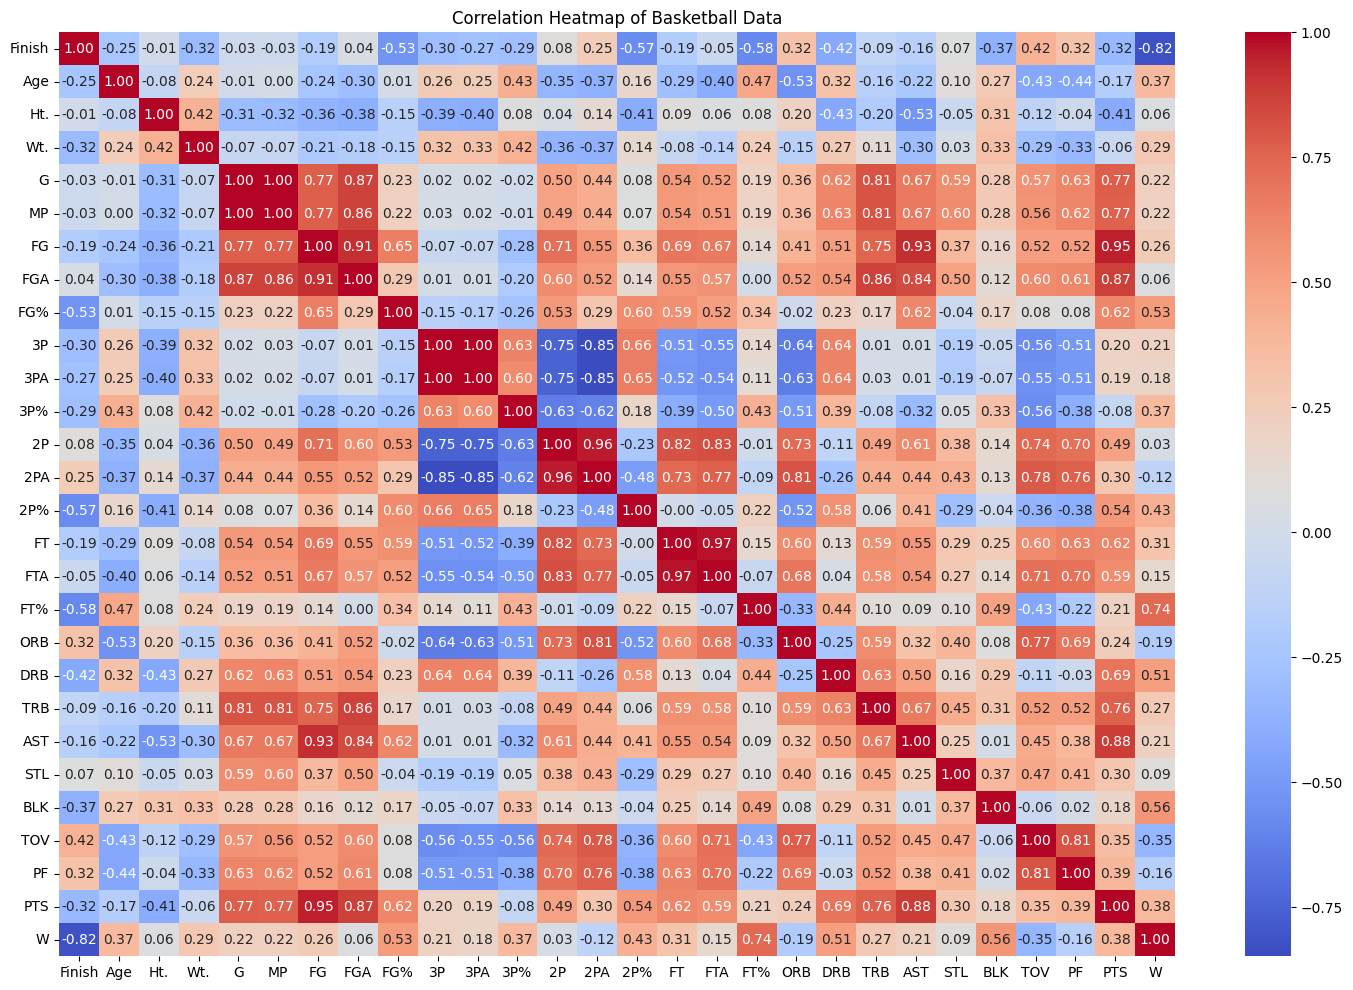

In [48]:
#สร้าง heatmap เพื่อดูความสัมพันธ์ระหว่างตัวแปร X
import seaborn as sns
import matplotlib.pyplot as plt

# รวม X และ y เข้าด้วยกันเพื่อคำนวณค่าความสัมพันธ์
df_corr = X.copy()
df_corr['W'] = y

# คำนวณค่าความสัมพันธ์
corr_matrix = df_corr.corr()

# สร้าง heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Basketball Data')
plt.show()

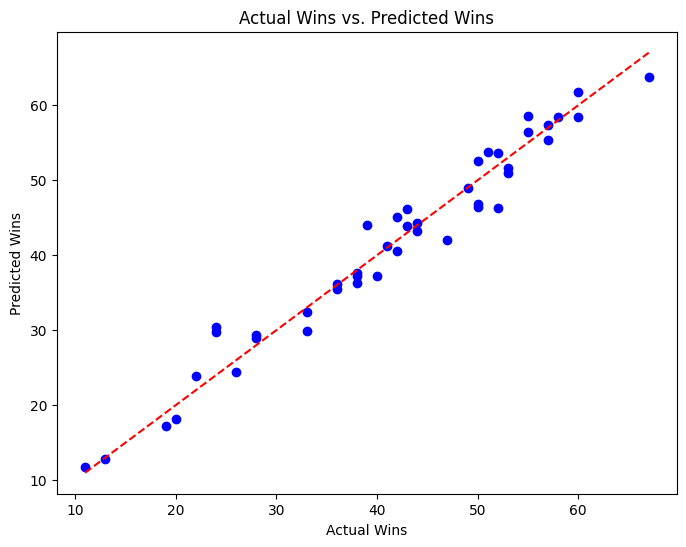

In [49]:
#สร้างกราฟดูการกระจายของผลการทำนายและเส้นการ fit ของโมเดล

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred, marker='o', color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.title("Actual Wins vs. Predicted Wins")
plt.show()

## Factor Analysis

In [26]:
# Get the coefficients from the model
coefficients = model.coef_

# Get the feature names
feature_names = X_train.columns

# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by their absolute value to see the most impactful factors
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient')

print("ปัจจัยที่มีผลต่อผลการชนะของทีม (เรียงตามความสำคัญ):")
display(coefficients_df)
#ค่าสัมประสิทธิ์ที่เป็นบวกหมายความว่าเมื่อค่าของปัจจัยนั้นเพิ่มขึ้น ผลการชนะมีแนวโน้มเพิ่มขึ้นด้วย ในทางกลับกัน ค่าสัมประสิทธิ์ที่เป็นลบหมายความว่าเมื่อค่าของปัจจัยนั้นเพิ่มขึ้น ผลการชนะมีแนวโน้มลดลง

ปัจจัยที่มีผลต่อผลการชนะของทีม (เรียงตามความสำคัญ):


,Feature,Coefficient
10,3PA,50.250639
7,FGA,47.343493
8,FG%,44.655791
26,PTS,-43.224751
6,FG,-33.633797
9,3P,-32.190865
16,FTA,25.390910
5,MP,19.672884
13,2PA,-17.729505
4,G,-17.281418


##Load Model

In [50]:
import pickle

# Assuming 'model' is your trained model
filename = 'model.pkl'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(model, file)